# Part 1: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

In [31]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the NumPy and Datascience modules.

import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this part of the project, you will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, you will examine the data for one country, Bangladesh. You will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, you will examine whether the changes we have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. you will study aspects of world population growth and see how they have been changing.

**Step 1.** Read the file "population.csv" into your project and look at data for all countries for time less than 2021

In [32]:
population = pd.read_csv("population.csv")
filtered_population = population[population['time'] < 2021]
print(filtered_population)

       geo  time  population_total
0      afg  1800           3280000
1      afg  1801           3280000
2      afg  1802           3280000
3      afg  1803           3280000
4      afg  1804           3280000
...    ...   ...               ...
59212  zwe  2016          14030338
59213  zwe  2017          14236599
59214  zwe  2018          14438812
59215  zwe  2019          14645473
59216  zwe  2020          14862927

[43537 rows x 3 columns]


### Bangladesh

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. you will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Bangladesh in each of those years.

In [33]:
b_pop = population[(population['geo'] =='bgd') & (population['time'] >= 1970) & (population['time'] <= 2020)]
b_pop = b_pop[['time', 'population_total']]
print(b_pop)

      time  population_total
4685  1970          64232486
4686  1971          65531635
4687  1972          66625706
4688  1973          67637541
4689  1974          68742222
4690  1975          70066310
4691  1976          71652386
4692  1977          73463593
4693  1978          75450033
4694  1979          77529040
4695  1980          79639498
4696  1981          81767516
4697  1982          83932132
4698  1983          86142490
4699  1984          88416529
4700  1985          90764180
4701  1986          93187593
4702  1987          95671159
4703  1988          98186350
4704  1989         100695496
4705  1990         103171957
4706  1991         105599125
4707  1992         107983708
4708  1993         110350641
4709  1994         112737684
4710  1995         115169933
4711  1996         117649927
4712  1997         120160571
4713  1998         122682818
4714  1999         125189655
4715  2000         127657862
4716  2001         130088709
4717  2002         132478077
4718  2003    

Create a table called b_five that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [34]:
b_five = b_pop.iloc[::5]
print(b_five)

      time  population_total
4685  1970          64232486
4690  1975          70066310
4695  1980          79639498
4700  1985          90764180
4705  1990         103171957
4710  1995         115169933
4715  2000         127657862
4720  2005         139035505
4725  2010         147575433
4730  2015         156256287
4735  2020         164689383


**Question 2.** Assign `initial` to an array that contains the population for every five year interval from 1970 to 2015 (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from 1975 to 2020 (inclusive). The first array should include both 1970 and 2015, and the second array should include both 1975 and 2020. You should use the `b_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$\left(\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\displaystyle\frac{1}{\text{number of years}}}\right) -1$$

In [35]:
initial_years = [1970, 2015]
changed_years = [1975, 2020]
initial_data = b_five[b_five['time'].isin(initial_years)]
changed_data = b_five[b_five['time'].isin(changed_years)]
initial_population = initial_data['population_total'].values
changed_population = changed_data['population_total'].values
total_years = changed_data.iloc[-1]['time'] - initial_data.iloc[0]['time']
growth_rate = ((changed_population / initial_population) ** (1 / total_years)) - 1
print(initial_population)
print(changed_population)
print(growth_rate)

[ 64232486 156256287]
[ 70066310 164689383]
[0.00174017 0.00105183]


While the population has grown every five years since 1970, you will notice that the annual growth rate decreased dramatically from 1985 to 2015. It is good to look at some other information in order to develop a possible explanation. Read the following files:

1. life_expectancy.csv where time is below 2021
2. child_mortality.csv where time is below 2021 and relabel column 2 to "child_mortality_under_5_per_1000_born"
3. fertility.csv where time is below 2021

Show the first 3 rows of these tables to ensure they are loaded correctly.

In [36]:
life_expectancy = pd.read_csv("life_expectancy.csv")
life_expectancy_below_2021 = life_expectancy[life_expectancy['time'] < 2021]
life_expectancy.head(3)

child_mortality = pd.read_csv("child_mortality.csv", header = None, names = ['geo', 'child_mortality_under_5_per_1000_born', 'time'])
child_mortality.head(3)

fertility = pd.read_csv("fertility.csv")
fertility_below_2021 = fertility[fertility['time'] < 2021]
fertility_below_2021.head(3)


,geo,time,children_per_woman_total_fertility
0,abw,1800,5.64
1,abw,1801,5.64
2,abw,1802,5.64


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

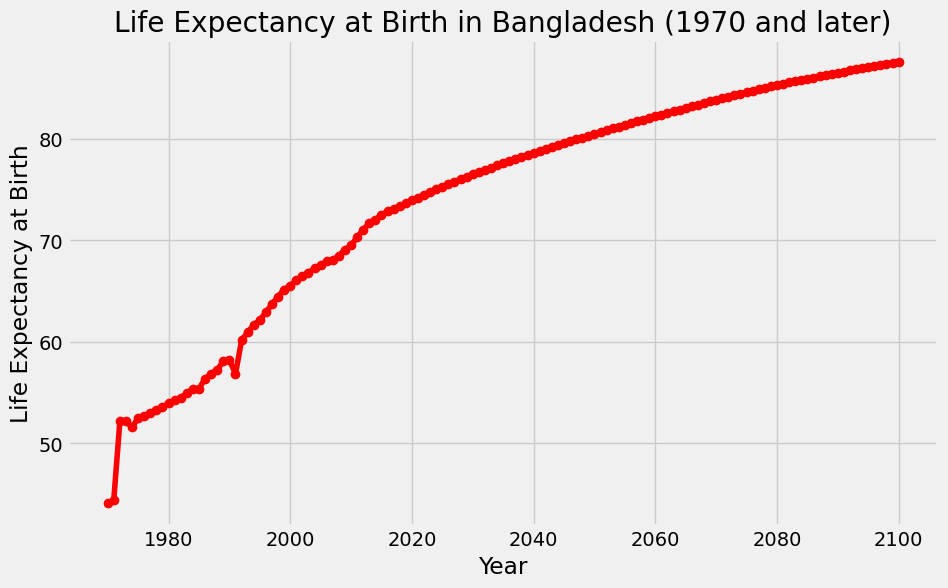

In [37]:
life_expectancy_bangladesh = life_expectancy[(life_expectancy['geo'] == 'bgd') & (life_expectancy['time'] >= 1970)] 
plots.figure(figsize = (10, 6))
plots.plot(life_expectancy_bangladesh['time'], life_expectancy_bangladesh['life_expectancy_years'], marker = 'o', linestyle = '-', color = 'r')
plots.title('Life Expectancy at Birth in Bangladesh (1970 and later)')
plots.xlabel('Year')
plots.ylabel('Life Expectancy at Birth')
plots.show()

**Question 4.** Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh? Why or why not? 

Hint: What happened in Bangladesh in 1991, and does that event explain the overall change in population growth rate? This [webpage](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone) provides relevant context.


In [38]:
#The 1991 Bangladesh cyclone played a significant role in the population growth rate's decrease from 1985 to 2015, because it took approximately 138,000 lives, numerous homes and many people's jobs. These factors negatively impacted people's livelihoods, health, and well being due to many being homeless as a result of losing their homes and jobs, so it made it more difficult for Bangladesh citizens to consider raising children in such conditions.  

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Complete the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, determine the Alpha-3 code for Bangladesh. The code for Bangladesh and the year 1970 are used in the call to your `fertility_over_time` function in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. You can uncomment the code to add your functionality 

<Axes: xlabel='time'>

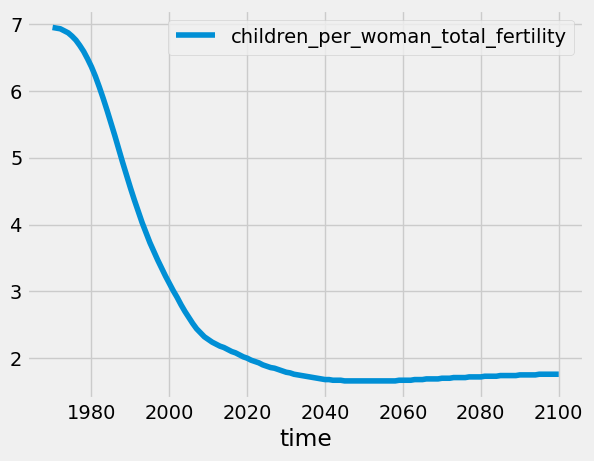

In [39]:
def fertility_over_time(country_code, start):
    # Create a two-column table that describes a country's total fertility rate each year."""
    fertility['time'] = fertility['time'].astype(int)
    fertility_country = fertility[(fertility['geo'] == country_code) & (fertility['time'] >= start)][['time', 'children_per_woman_total_fertility']]
    return fertility_country

bangladesh_code = 'bgd'                                                                                                  
                                                                                                      
fertility_over_time(bangladesh_code, 1970).plot(0, 1) 

**Question 6.** Assuming everything else is constant, do the trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh? Why or why not?

In [40]:
#As insightful as the trends in fertility from the graph are, it's important to consider things like life expectancy and child mortality rates, since they provide just as significant information on what variables are contributing to the decreasing population rate. Other relevant variables to consider include the state of the economy and cultural trends, because the usually there are multiple reasons for decreasing population rates. 

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

Create a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.



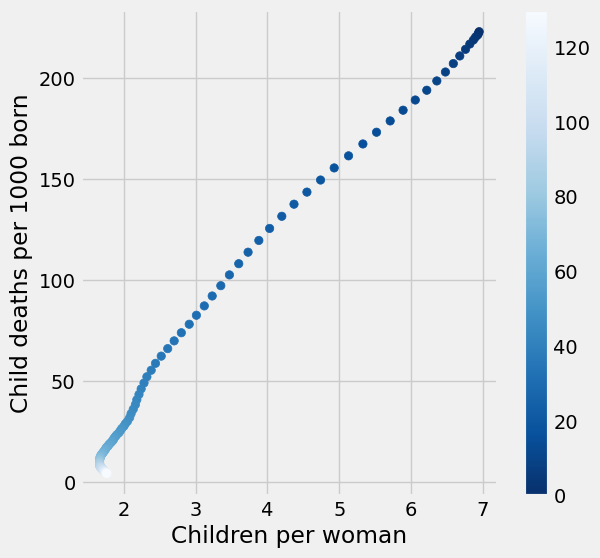

In [41]:
child_mortality = pd.read_csv("child_mortality.csv", dtype = {'time': str})
fertility = pd.read_csv("fertility.csv", dtype={'time': str})

merged_data = pd.merge(fertility, child_mortality, on=['geo', 'time'])
post_1969_fertility_and_child_mortality = merged_data[(merged_data['geo'] == 'bgd') & (merged_data['time'] >= '1970')]
post_1969_fertility_and_child_mortality = post_1969_fertility_and_child_mortality[['time', 'children_per_woman_total_fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born']]
post_1969_fertility_and_child_mortality.columns = ['time', 'Children per woman', 'Child deaths per 1000 born']

post_1969_fertility_and_child_mortality['time'] = post_1969_fertility_and_child_mortality['time'].astype(int) - 1970


x_births = post_1969_fertility_and_child_mortality["Children per woman"]
y_deaths = post_1969_fertility_and_child_mortality["Child deaths per 1000 born"]
time_colors = post_1969_fertility_and_child_mortality["time"]
plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality *causes* parents to choose to have fewer children?

In [42]:
#Even though this graph illustrates that child mortality rates increase as the number of children per woman increases, it does not necessarily mean that reduced child mortality causes parents to choose to have fewer children. It may be a factor but there are other things to consider, such as the affordabilty and accessibilty of healthcare, current social norms, and the accessibilty of education.  